> 주제1. 2018년도 영화 키워드 분석 
> 2018년도 영화 분석 : 영화별 평점, 댓글수 등
> - 랭킹 분석 : 영화랭킹, 장르별, 감독, 연기자 => TOP5 선정
> - TOP5 키워드 분석 : 뉴스, 블로그, 카페, 영화평, 댓글 등 키워드 분석
> - 결론 : 미리보는 연말영화시상예측 및 주요키워드에 따른 2018년도 주요트랜드 파악

# 2018 청룡영화제 남녀주연상 수상자 예측 
2013-2017 5년간의 청룡영화제 남녀주연상 수상작 댓글 분석을 통해 2018 수상자 예측하기 

> -가설1) 이전 수상작 댓글에서 연기력,배우와 관련된 단어들이 많이 언급될 것이다.
>
> -가설2) 가설1에서 도출한 단어들이 많이 언급된 영화의 배우가 2018 청룡영화제 남녀주연상을 수상할것이다.

## 1.데이터 수집

- 2018 영화흥행순 70개 영화 api 다운  (영화진흥위원회)
- 2013-2017 수상작 데이터 (csv로) 
- 리뷰 크롤링 

### 2018 영화흥행순 70개 영화 api 다운
- http://www.kobis.or.kr/kobis/business/stat/offc/searchOfficHitTotList.do?searchMode=year

청룡영화제 수상 대상에 해당하는 2018년 한국 국적의 상업영화 

총 434건 중 70위권 이하의 경우 상영관이 10개 미만이며 관객수 1000명 이하인 경우가 대다수

-> 흥행 순위 70위권으로 분석 데이터 선정

- 영화데이터분석/2018 전체작/movie2018_69.csv



In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image
import pandas as pd

import re

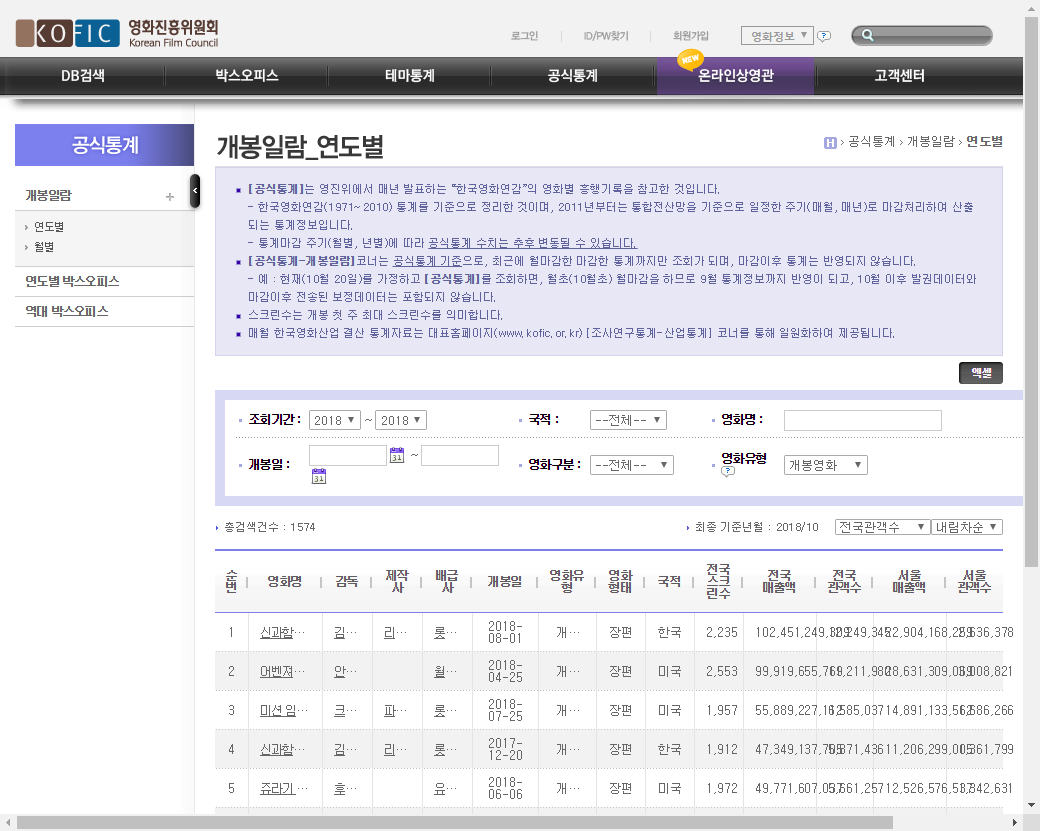

In [7]:
driver_path = '../driver/chromedriver.exe'
driver = webdriver.Chrome(executable_path=driver_path)
url_page = 'http://www.kobis.or.kr/kobis/business/stat/offc/searchOfficHitTotList.do?searchMode=year'
driver.get(url_page)
capture_img = 'data/2018_movie_70_api.png'
driver.save_screenshot(capture_img)
Image(capture_img)

### 2013-2017 수상작 데이터 (csv로)

- 영화데이터분석 / 이전 수상작 / awarded.csv

### 리뷰크롤링

> - 네이버 영화의 평점,리뷰 항목에서 selenium 을 통해 미리 만들어놓은 데이터 중 영화명을 순차적으로 입력 
> - 입력된 영화의 코드명과 총 리뷰수, 마지막 페이지 수를 구함 
> - 마지막 페이지수까지 for구문을 통해 반복적으로 리뷰를 크롤링해서 리스트에 저장 
> - 영화 코드명,리뷰수,마지막 페이지 등의 정보가 담긴 csv를 데이터 프레임화 하여 csv로 저장 
> - 영화 전체 리뷰들 저장 
>
> 위의 과정을 2018 전체작, 2018이전 수상작들 모두 시행하여 데이터 추출 

In [9]:
#리뷰 크롤링을 위한 모듈 임포트 
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image
from urllib.request import urlopen
import pandas as pd
import re
import time

In [10]:
# 웹드라이브로 크롬브라우즈 띄운다.
class OpenDriverMovieSite():
    driver_path = "../driver/chromedriver.exe"
    driver = webdriver.Chrome(executable_path=driver_path)
    url_page = 'https://movie.naver.com/movie/point/af/list.nhn'
    movieName = ''
    allReviews = []
    allReviewsIndex = []
    a = 1

    def __init__(self):
        # 클래스를 실행하면 홈페이지로 이동한다.
        self.driver.get(self.url_page)
        time.sleep(1)

    def ReadCSV(self, movie2018):
        movie_name = movie2018['영화명']
        movie_name[1]
        for i in range(0, len(movie2018)):  # CSV 파일의 Rows 갯수를 뒤에 넣어주세여 (1, Rows갯수)
            #             print(self.movieName)
            print(movie_name[i])
            self.movieName = movie_name[i]
            self.BasicOpen()
            self.InputMovieTitle(movie_name[i])

    def BasicOpen(self):
        # 켜진 홈페이지에서 관련영화를 클릭한 후 새로운 창으로 전환하는 것까지
        # 영화명이 지속적으로 바뀔 것이므로 BasicOpen 함수를 활용
        self.driver.find_element_by_xpath('//*[@id="old_content"]/fieldset/form/select').click()
        time.sleep(0.5)
        self.driver.find_element_by_xpath('//*[@id="old_content"]/fieldset/form/select/option[2]').click()
        time.sleep(0.5)
        self.driver.find_element_by_xpath('//*[@id="old_content"]/fieldset/form/input[3]').click()
        time.sleep(0.5)
        self.driver.switch_to.window(self.driver.window_handles[-1])
        self.driver.find_element_by_xpath(
            '//*[@id="page_content"]/div/div/div/div/form/table/tbody/tr/td/input[1]').click()
        time.sleep(0.5)

    def InputMovieTitle(self, movie_title):
        self.driver.find_element_by_css_selector(
            '#page_content > div > div > div > div > form > table > tbody > tr > td > input.input_type_text_1').send_keys(
            movie_title)
        time.sleep(0.5)
        self.driver.find_element_by_xpath(
            '//*[@id="page_content"]/div/div/div/div/form/table/tbody/tr/td/input[2]').click()
        time.sleep(0.5)
        self.driver.find_element_by_xpath('//*[@id="page_content"]/div/div/div[2]/table/tbody/tr[2]/td/a/img').click()
        time.sleep(0.5)
        self.driver.switch_to.window(self.driver.window_handles[0])
        time.sleep(0.5)
        self.driver.find_element_by_xpath('//*[@id="old_content"]/fieldset/form/input[4]').click()

        html = urlopen(self.driver.current_url)
        soup = BeautifulSoup(html, "lxml")
        # 코드값 찾아주기
        pattern = re.compile("\d+")
        result = pattern.findall(self.driver.current_url)
        print(result)
        code = result[0] if len(result) > 0 else ''

        # 리뷰의 총개수
        num = soup.find("strong", "c_88 fs_11").get_text()
        num_total = int(num.replace(',', ''))
        last_page = num_total // 10 + 1
        temp = "번호 : {} // 영화명 : {} // code : {} // num_total : {} // last_page : {}".format(self.a, self.movieName,
                                                                                             code, num_total, last_page)
        self.allReviewsIndex.append(temp)
        #         print("번호 : {} // 영화명 : {} // code : {} // num_total : {} // last_page : {}".format(self.a, self.movieName, code, num_total, last_page))
        self.a = self.a + 1

        #         last_page = 1000 if last_page > 1000 else last_page
        last_page = 1000 if last_page > 1000 else last_page

        self.GetReviews(code, num_total, last_page)

    def GetReviews(self, code, num_total, last_page):
        tmp = []
        for i in range(last_page):

            # 각 리뷰 페이지로 이동해서 그 url로 드라이버 창 넘어가고-> 수프화
            url_page = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword={}&target=&page={}'.format(code,
                                                                                                                  i + 1)
            print("\"{}\"의 {} 페이지를 수집하고 있습니다..".format(self.movieName, url_page))
            html = urlopen(url_page)
            soup = BeautifulSoup(html, "lxml")
            # 리뷰들 뽑아줌
            review = soup.find_all("td", "title")
            #불필요한 항목들 제거해서 유효한 문장만 뽑아내기
            for i in range(len(review)):
                review[i] = review[i].get_text()
                review[i] = review[i].replace('\n', '')
                review[i] = review[i].replace(self.movieName, '')  
                review[i] = review[i].replace('\r', '')
                review[i] = review[i].replace('\t', '')
                review[i] = review[i].replace('신고', '')
                tmp.append(review[i])
        self.allReviews.append(tmp)


if __name__ == "__main__":
    opendrivermoviesite = OpenDriverMovieSite()
    movie2018 = pd.read_csv('data/awarded.csv', sep=',', encoding='euc-kr')
    opendrivermoviesite.ReadCSV(movie2018)

FileNotFoundError: File b'data/awarded.csv' does not exist

In [ ]:
#데이터 프레임으로 변환해서  csv 파일로 저장
df_all = pd.DataFrame(opendrivermoviesite.allReviews)
df_all.to_csv('data/allreviews.csv', sep=',', encoding='euc-kr')
allreview_index.to_csv('data/allreview_index_df.csv', sep=',', encoding='euc-kr')

In [ ]:
#타이틀, 코드, 총 리뷰수, 마지막 페이지 정보 분리
title = []
code = []
num_total= []
last_page = []
for i in range(len(opendrivermoviesite.allReviewsIndex)):
    y = opendrivermoviesite.allReviewsIndex[i].split("//")
    t = y[1].split(":")
    c = y[2].split(":")
    n = y[3].split(":")
    l = y[4].split(":")
    title.append(t[1])
    code.append(c[1])
    num_total.append(n[1])
    last_page.append(l[1])
title[:3] , code[:3],  num_total[:3], last_page[:3]

In [ ]:
#데이터 프레임으로 변환
allreview_index = pd.DataFrame(({'제목':title, 
                          '코드':code, 
                          '총리뷰수':num_total, 
                          '마지막페이지':last_page}))

In [ ]:
#csv 파일로 저장
allreview_index.to_csv('data/allreview_index_df.csv', sep=',', encoding='euc-kr')